# Principal component analysis

In [7]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
type(df_wine.iloc[:, 1:].values)

numpy.ndarray

In [11]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
X_train_std.shape

(124, 13)

In [84]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.60904624  2.58694581  1.48342648  1.01296796  0.80274502  0.67220992
  0.55435313  0.10226076  0.3440145   0.3179616   0.17356328  0.23908289
  0.20711346]


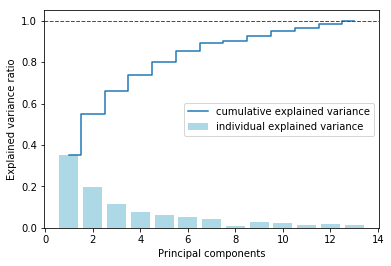

In [85]:
import matplotlib.pyplot as plt
var_exp = eigen_vals/eigen_vals.sum()
plt.bar(range(1, var_exp.shape[0]+1), var_exp, color='lightblue', align='center', label='individual explained variance')
plt.step(range(1, var_exp.shape[0]+1), np.cumsum(var_exp), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.axhline(y=1.0, linewidth=1, color='r', linestyle='--')
plt.show()


In [86]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

In [87]:
w

array([[-0.09041052,  0.47673487],
       [ 0.25298779,  0.17699549],
       [ 0.01602653,  0.3238999 ],
       [ 0.23041073, -0.02707893],
       [-0.08008494,  0.38435766],
       [-0.40226932,  0.0878164 ],
       [-0.43202681,  0.02713712],
       [ 0.29396827,  0.01053185],
       [-0.30712828,  0.07541547],
       [ 0.14263937,  0.48287748],
       [-0.32126087, -0.2547302 ],
       [-0.39611073, -0.11157837],
       [-0.24164525,  0.40406288]])

In [88]:
X_train_std[0].dot(w)

array([ 0.95748971, -2.17579819])

In [101]:
X_train_pca = np.dot(X_train_std, w)

In [102]:
X_train_pca.shape

(124, 2)

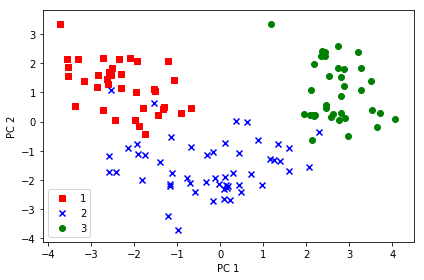

In [105]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for lbl, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == lbl, 0], 
                X_train_pca[y_train == lbl, 1], 
                c=c, label=lbl, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [106]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifer, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifer.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=(0, 0, 0),
                   alpha=1.0, linewidth=1, marker='o',
                   s=5, label='test set')

In [109]:
x = np.arange(10)

xx, yy = np.meshgrid(x, x)

In [112]:
xx

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [113]:
xx.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
yy

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [115]:
yy.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

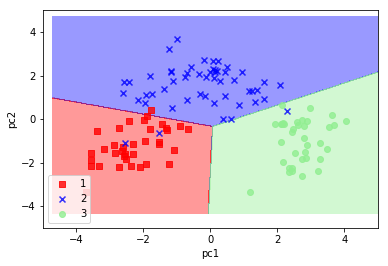

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifer=lr)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(loc='lower left')
plt.show()

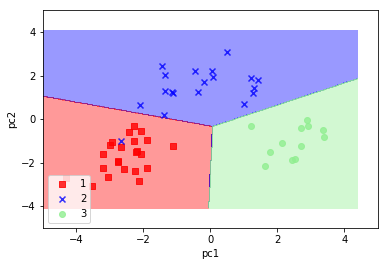

In [119]:
plot_decision_regions(X_test_pca, y_test, classifer=lr)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend(loc='lower left')
plt.show()

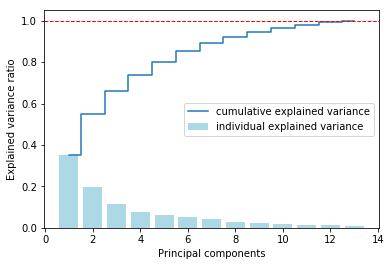

In [122]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
var_exp = pca.explained_variance_ratio_
plt.bar(range(1, var_exp.shape[0]+1), var_exp, color='lightblue', align='center', label='individual explained variance')
plt.step(range(1, var_exp.shape[0]+1), np.cumsum(var_exp), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.axhline(y=1.0, linewidth=1, color='r', linestyle='--')
plt.show()

# Kernel principal component analysis

In [214]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np


In [241]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   

    """
    sq_dists = pdist(X)
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    return X_pc, eigvals, eigvecs

### centering the kernel
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

Here, what we wanna do is

$K = K - E_{x}(K) - E_{y}(K) - E_{x}(E_{y}(K))$

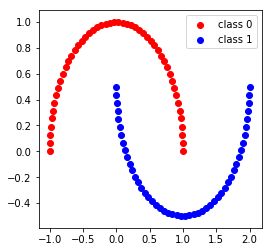

In [243]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', label='class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='class 1')
plt.legend(loc='best')
plt.show()

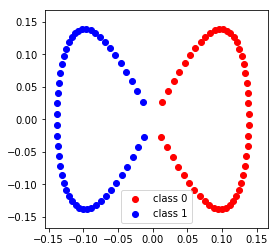

In [244]:
X_kpca, eigvals, eigvecs = rbf_kernel_pca(X, gamma=15, n_components=2)
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], c='r', label='class 0')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], c='b', label='class 1')
plt.legend(loc='best')
plt.show()

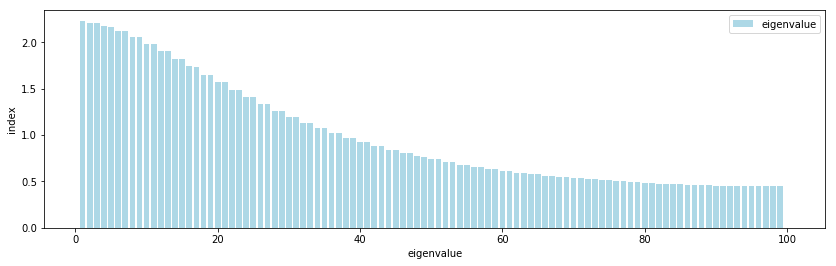

In [249]:
plt.rcParams['figure.figsize'] = (14.0, 4.0)
plt.bar(range(1, eigvals.shape[0]+1), eigvals, color='lightblue', align='center', label='eigenvalue')
plt.ylabel('index')
plt.xlabel('eigenvalue')
plt.legend(loc='best')
plt.show()

In [218]:
class DataSet:
    def __init__(self):
        pass
        
    def generate_data_set_dim2_nonlinear(self, ns):
        """
        this function generates a 2d data set of two classes which are linearly separated.

        Arguments:
            ns: number of samples

        Output:
            ds1: data on the negative side (3, ns). ds1[1] = 0 is the label.
            ds2: data on the positive side (3, ns). ds2[1] = 0 is the label.
            data  : data combined ds1 and ds2 and shuffled. (2, ns)
            label : label combined ds1 and ds2 and shuffled. (2, ns)
        """
        ns_neg = int(0.5 * ns)
        ns_pos = ns - ns_neg

        ang1 = np.linspace(0, 3*np.pi, ns_neg)
        rad1 = ang1 + 0.05
        ang1 += 0.4 * np.pi * (np.random.rand(ns_neg) - 0.5)
        ds1x = rad1 * np.cos(ang1)
        ds1y = rad1 * np.sin(ang1)
        ds1 = np.vstack((ds1x, ds1y))

        ang2 = np.linspace(0, 3*np.pi, ns_neg)
        rad2 = ang2 + 0.05
        ang2 += 0.4 * np.pi * (np.random.rand(ns_neg) - 0.5)+ np.pi
        ds2x = rad2 * np.cos(ang2)
        ds2y = rad2 * np.sin(ang2)
        ds2 = np.vstack((ds2x, ds2y))

        ds1s = np.vstack((ds1, np.zeros(ns_neg)))
        ds2s = np.vstack((ds2, np.ones(ns_pos)))
        ds = np.hstack((ds1s, ds2s))
        np.random.shuffle(ds.T)

        data = ds[:2]
        label = ds[2][np.newaxis, :]

        datas, mu, sg = self.scale_coordinates(data)
        ds1s = (ds1[:2] - mu)/sg
        ds2s = (ds2[:2] - mu)/sg

        plt.subplot(1,2,1)
        red  = plt.scatter(ds1s[0], ds1s[1], c=(1., 0., 0.), s=3)
        blue = plt.scatter(ds2s[0], ds2s[1], c=(0., 0., 1.), s=3)
        plt.xlim((-3, 3))
        plt.ylim((-3, 3))
        plt.legend([red, blue], ["group 0", "group 1"])
        
        plt.subplot(1,2,2)
        red  = plt.scatter(ds1s[0], ds1s[1], c=(1., 0., 0.), s=3)
        blue = plt.scatter(ds2s[0], ds2s[1], c=(0., 0., 1.), s=3)
        plt.xlim((-3, 3))
        plt.ylim((-3, 3))

        return ds1s, ds2s, datas, label

    def scale_coordinates(self, x):
        mu = x.mean(keepdims=1)
        sg = x.std()
        xs = (x - mu)/sg
        return xs, mu, sg



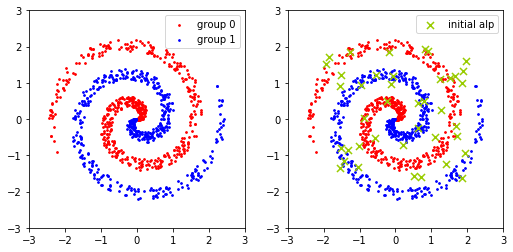

In [250]:
D = 2
K = 40
N = 1000
data = DataSet()
alp = 2 * 2 * (np.random.rand(D, K) - 0.5)
phi = 2 * 2 * (np.random.rand(1, K + 1) - 0.5)

plt.rcParams['figure.figsize'] = (8.5, 4.0)
ds1, ds2, x, w = data.generate_data_set_dim2_nonlinear(N)
ds = {'1': ds1, '2': ds2}
init = plt.scatter(alp[0], alp[1], s=50, c=(0.6, 0.8, 0.), marker='x')
plt.legend([init], ["initial alp"])
plt.show()

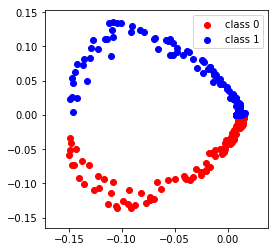

In [252]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
X_kpca, eigvals, eigvecs = rbf_kernel_pca(x.T, gamma=15, n_components=2)
plt.scatter(X_kpca[w.squeeze() == 0, 0], X_kpca[w.squeeze() == 0, 1], c='r', label='class 0')
plt.scatter(X_kpca[w.squeeze() == 1, 0], X_kpca[w.squeeze() == 1, 1], c='b', label='class 1')
plt.legend(loc='best')
plt.show()

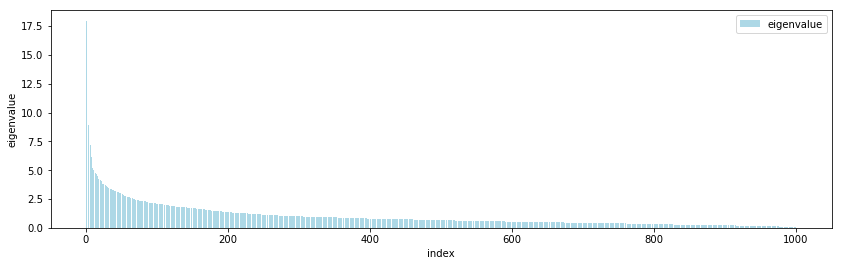

In [254]:
plt.rcParams['figure.figsize'] = (14.0, 4.0)
plt.bar(range(1, eigvals.shape[0]+1), eigvals, color='lightblue', align='center', label='eigenvalue')
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.legend(loc='best')
plt.show()

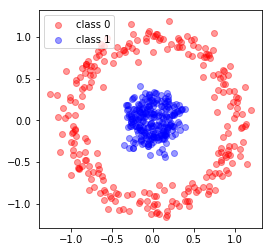

In [257]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.1, factor=0.2, random_state=0)
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', label='class 0', alpha=0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='class 1', alpha=0.4)
plt.legend(loc='best')
plt.show()


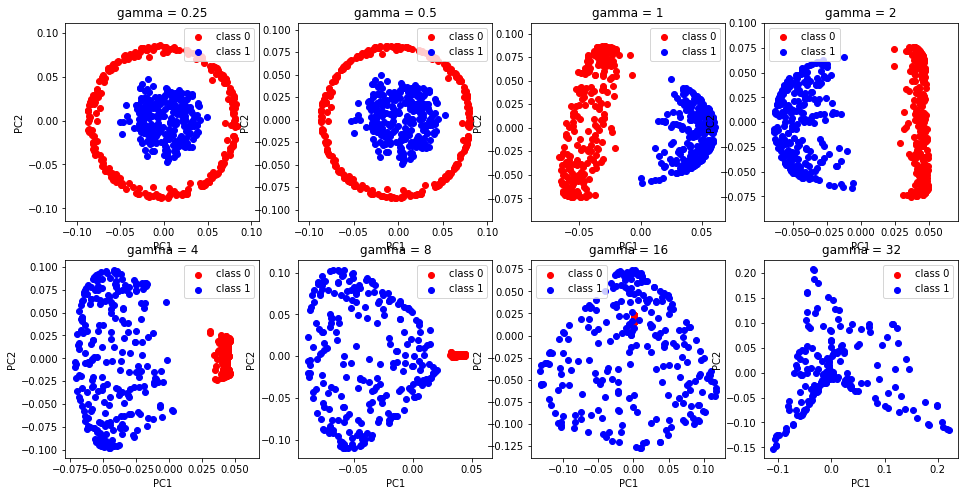

In [283]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)
gammas = [0.25, 0.5, 1, 2, 4, 8, 16, 32]
plt.figure()
for idx, gamma in enumerate(gammas):
    X_kpca, eigvals, eigvecs = rbf_kernel_pca(X, gamma, n_components=5)
    plt.subplot(2, 4, idx+1)
    plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], c='r', label='class 0')
    plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], c='b', label='class 1')
    plt.legend(loc='best')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("gamma = {}".format(gamma))
plt.show()

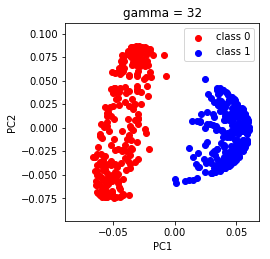

In [284]:
X_kpca, eigvals, eigvecs = rbf_kernel_pca(X, gamma=1, n_components=5)
plt.subplot(2, 4, idx+1)
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], c='r', label='class 0')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], c='b', label='class 1')
plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("gamma = {}".format(gamma))
plt.show()

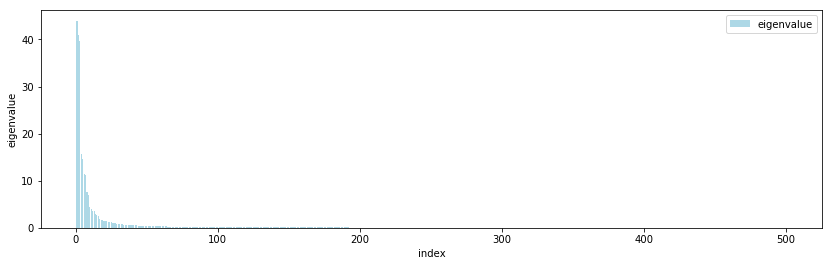

In [285]:
plt.rcParams['figure.figsize'] = (14.0, 4.0)
plt.bar(range(1, eigvals.shape[0]+1), eigvals, color='lightblue', align='center', label='eigenvalue')
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.legend(loc='best')
plt.show()

# with scikit-learn API

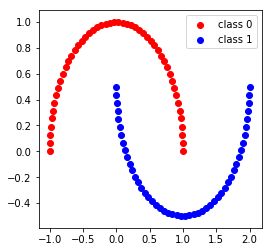

In [19]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
plt.rcParams['figure.figsize'] = (4.0, 4.0)
X, y = make_moons(n_samples=100, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', label='class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='class 1')
plt.legend(loc='best')
plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "top". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


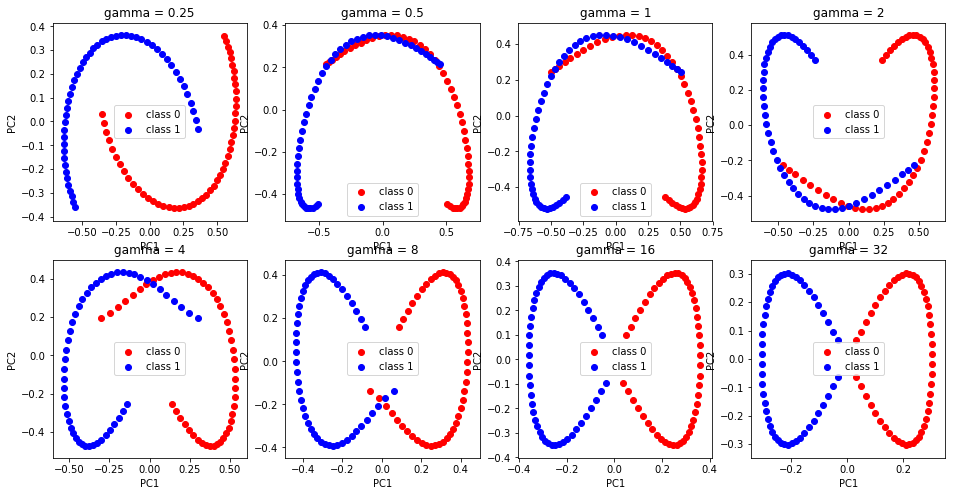

In [21]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)
gammas = [0.25, 0.5, 1, 2, 4, 8, 16, 32]
plt.figure()
for idx, gamma in enumerate(gammas):
    sk_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma).fit_transform(X)
    plt.subplot(2, 4, idx+1)
    plt.scatter(sk_kpca[y == 0, 0], sk_kpca[y == 0, 1], c='r', label='class 0')
    plt.scatter(sk_kpca[y == 1, 0], sk_kpca[y == 1, 1], c='b', label='class 1')
    plt.legend(loc='')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title("gamma = {}".format(gamma))
plt.show()